## 作業

請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import backend
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import SGD
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


## 參考資料

[深度学习超参数简单理解](https://zhuanlan.zhihu.com/p/23906526)

[Estimating an Optimal Learning Rate For a Deep Neural Network](https://towardsdatascience.com/estimating-optimal-learning-rate-for-a-deep-neural-network-ce32f2556ce0)

[CS231n Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/neural-networks-3/)

## 準備資料

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
def normalize_cifar10_data(x, y):
    x = x.reshape((len(x), -1)) / 255.
    y = np_utils.to_categorical(y, num_classes=10)
    return x, y

def normalize_result(x, y):
    print('x.shape:', x.shape)
    print('y.shape:', y.shape)

In [4]:
print('Before normalization:')
normalize_result(X_train, y_train)

Before normalization:
x.shape: (50000, 32, 32, 3)
y.shape: (50000, 1)


In [5]:
print('After normalization:')
X_train, y_train = normalize_cifar10_data(X_train, y_train)
X_test, y_test = normalize_cifar10_data(X_test, y_test)
normalize_result(X_train, y_train)

After normalization:
x.shape: (50000, 3072)
y.shape: (50000, 10)


## 定義函數

In [6]:
def train_models(X_train, y_train, X_test, y_test, epochs, batch_size, learning_rate, momentums=(), nesterov=True):
    train_histories = []
    for i, momentum in enumerate(momentums):
        print('Experiment with momentum: {:.6f}'.format(momentum))
        backend.clear_session() # 清掉舊的 Graph
        model = build_model(X_train, (X_train.shape[-1],), 10, neuron_numbers=(512, 256, 128,))
        model.summary()
        model.compile(optimizer=SGD(lr=learning_rate, momentum=momentum, nesterov=nesterov),
                      loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test,),
                  shuffle=True, verbose=2)
        train_histories.append(model.history)
    return train_histories

def build_model(x, input_shape, output_units, neuron_numbers=()):
    main_input, hidden_layer = Input(shape=input_shape, name='main_input'), None
    for i, neuron_number in enumerate(neuron_numbers):
        dense_layer = Dense(units=neuron_number, activation='relu', name=f'hidden_layer{i}')
        hidden_layer = dense_layer(hidden_layer) if hidden_layer is not None else dense_layer(main_input)
    main_output = Dense(units=output_units, activation='softmax', name='main_output')(hidden_layer)
    return Model(inputs=[main_input], outputs=[main_output])

def show_train_histories(train_histories, train_name, val_name, colors, momentums):
    plt.figure(figsize=(8, 6,))
    for i, train_history in enumerate(train_histories):
        show_train_history(train_history, train_name, val_name, colors[i], momentums[i])
    plt.xlabel('Epoch')
    plt.ylabel(train_name)
    plt.title('Train History')
    plt.legend()
    plt.show()

def show_train_history(train_history, train_name, val_name, color, momentum):
    plt.plot(train_history.history[train_name], '-', label='exp-mo-{:.2f}'.format(momentum), color=color)
    plt.plot(train_history.history[val_name], '--', label='exp-mo-{:.2f}'.format(momentum), color=color)

## 使用 default 的動量模式在不同係數下觀看學習曲線的走勢

In [7]:
## 設定超參數
epochs = 50
batch_size = 256
learning_rate = 0.01
momentums = [0.00, 0.25, 0.50, 0.75, 1.00]
nesterov = False

## 設定繪圖參數
colors = ['r', 'g', 'b', 'y', 'm']

In [8]:
train_histories = train_models(X_train, y_train, X_test, y_test, epochs, batch_size, learning_rate,
                               momentums=momentums, nesterov=nesterov)

Experiment with momentum: 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
main_output (Dense)          (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 10s - loss: 2.0755 - acc: 0.2584 

 - 10s - loss: 1.3871 - acc: 0.5112 - val_loss: 1.5358 - val_acc: 0.4485
Epoch 23/50
 - 12s - loss: 1.3719 - acc: 0.5159 - val_loss: 1.4447 - val_acc: 0.4839
Epoch 24/50
 - 11s - loss: 1.3689 - acc: 0.5179 - val_loss: 1.5237 - val_acc: 0.4670
Epoch 25/50
 - 11s - loss: 1.3582 - acc: 0.5230 - val_loss: 1.4750 - val_acc: 0.4786
Epoch 26/50
 - 11s - loss: 1.3466 - acc: 0.5254 - val_loss: 1.5224 - val_acc: 0.4548
Epoch 27/50
 - 11s - loss: 1.3312 - acc: 0.5325 - val_loss: 1.4164 - val_acc: 0.4991
Epoch 28/50
 - 11s - loss: 1.3255 - acc: 0.5338 - val_loss: 1.3877 - val_acc: 0.5054
Epoch 29/50
 - 11s - loss: 1.3144 - acc: 0.5365 - val_loss: 1.5508 - val_acc: 0.4526
Epoch 30/50
 - 11s - loss: 1.3079 - acc: 0.5412 - val_loss: 1.5404 - val_acc: 0.4469
Epoch 31/50
 - 11s - loss: 1.2935 - acc: 0.5443 - val_loss: 1.4037 - val_acc: 0.4984
Epoch 32/50
 - 11s - loss: 1.2829 - acc: 0.5460 - val_loss: 1.4502 - val_acc: 0.4843
Epoch 33/50
 - 11s - loss: 1.2707 - acc: 0.5520 - val_loss: 1.4784 - val_acc:

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 11s - loss: 1.9280 - acc: 0.3122 - val_loss: 1.7954 - val_acc: 0.3601
Epoch 2/50
 - 11s - loss: 1.7370 - acc: 0.3860 - val_loss: 1.7317 - val_acc: 0.3788
Epoch 3/50
 - 11s - loss: 1.6498 - acc: 0.4175 - val_loss: 1.6184 - val_acc: 0.4327
Epoch 4/50
 - 11s - loss: 1.5870 - acc: 0.4385 - val_loss: 1.5859 - val_acc: 0.4393
Epoch 5/50
 - 11s - loss: 1.5401 - acc: 0.4558 - val_loss: 1.6308 - val_acc: 0.4232
Epoch 6/50
 - 11s - loss: 1.5095 - acc: 0.4673 - val_loss: 1.5810 - val_acc: 0.4442
Epoch 7/50
 - 11s - loss: 1.4727 - acc: 0.4797 - val_loss: 1.5254 - val_acc: 0.4637
Epoch 8/50
 - 11s - loss: 1.4402 - acc: 0.4911 - val_loss: 1.5034 - val_acc: 0.4666
Epoch 9/50
 - 11s - loss: 1.4110 - acc: 0.5001 - val_loss: 1.5109 - val_acc: 0.4582
Epoch 10/50
 - 11s - loss: 1.3882 - acc: 0.5087 - val_loss: 1.5759 - val_acc: 0.4403
Epoch 11/50
 - 11s - loss: 1.3629 - acc: 0.5176 - val_loss: 1.4179 - val_acc: 0.4970
Epoch 12/50
 - 11s - los

Epoch 35/50
 - 11s - loss: 2.3878 - acc: 0.1006 - val_loss: 2.3878 - val_acc: 0.1000
Epoch 36/50
 - 11s - loss: 2.3964 - acc: 0.1010 - val_loss: 2.4148 - val_acc: 0.1000
Epoch 37/50
 - 11s - loss: 2.3967 - acc: 0.1010 - val_loss: 2.4427 - val_acc: 0.1000
Epoch 38/50
 - 11s - loss: 2.3965 - acc: 0.0996 - val_loss: 2.4338 - val_acc: 0.1000
Epoch 39/50
 - 11s - loss: 2.3994 - acc: 0.0990 - val_loss: 2.3907 - val_acc: 0.1000
Epoch 40/50
 - 11s - loss: 2.4033 - acc: 0.1011 - val_loss: 2.3635 - val_acc: 0.1000
Epoch 41/50
 - 11s - loss: 2.4138 - acc: 0.0990 - val_loss: 2.3688 - val_acc: 0.1000
Epoch 42/50
 - 11s - loss: 2.4085 - acc: 0.0998 - val_loss: 2.3961 - val_acc: 0.1000
Epoch 43/50
 - 11s - loss: 2.4122 - acc: 0.0989 - val_loss: 2.4305 - val_acc: 0.1000
Epoch 44/50
 - 11s - loss: 2.4005 - acc: 0.0982 - val_loss: 2.4377 - val_acc: 0.1000
Epoch 45/50
 - 11s - loss: 2.4009 - acc: 0.1003 - val_loss: 2.4209 - val_acc: 0.1000
Epoch 46/50
 - 11s - loss: 2.4039 - acc: 0.1016 - val_loss: 2.391

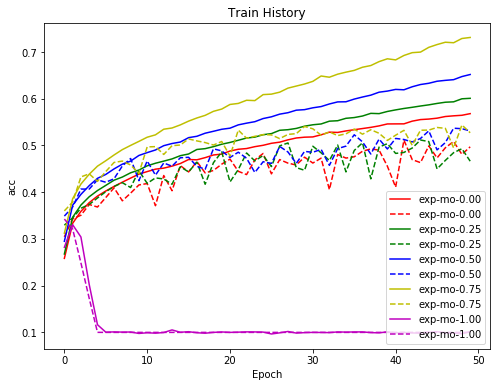

In [9]:
show_train_histories(train_histories, 'acc', 'val_acc', colors, momentums)

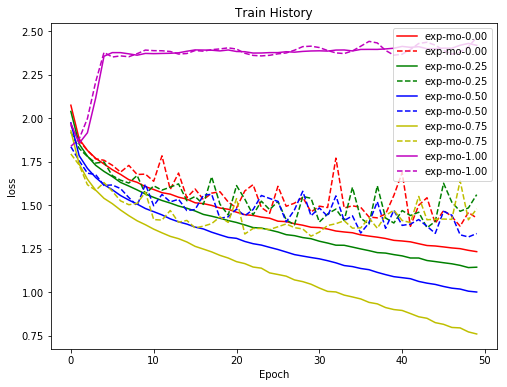

In [10]:
show_train_histories(train_histories, 'loss', 'val_loss', colors, momentums)

## 使用 Nesterov 的動量模式在不同係數下觀看學習曲線的走勢

In [11]:
## 設定超參數
epochs = 50
batch_size = 256
learning_rate = 0.01
momentums = [0.00, 0.25, 0.50, 0.75, 1.00]
nesterov = True

## 設定繪圖參數
colors = ['r', 'g', 'b', 'y', 'm']

In [12]:
train_histories = train_models(X_train, y_train, X_test, y_test, epochs, batch_size, learning_rate,
                               momentums=momentums, nesterov=nesterov)

Experiment with momentum: 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
main_output (Dense)          (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 12s - loss: 2.0882 - acc: 0.2567 

 - 11s - loss: 1.4157 - acc: 0.5001 - val_loss: 1.4926 - val_acc: 0.4662
Epoch 23/50
 - 11s - loss: 1.3993 - acc: 0.5046 - val_loss: 1.4492 - val_acc: 0.4875
Epoch 24/50
 - 11s - loss: 1.3857 - acc: 0.5135 - val_loss: 1.4712 - val_acc: 0.4704
Epoch 25/50
 - 11s - loss: 1.3811 - acc: 0.5133 - val_loss: 1.5364 - val_acc: 0.4474
Epoch 26/50
 - 11s - loss: 1.3693 - acc: 0.5188 - val_loss: 1.5341 - val_acc: 0.4555
Epoch 27/50
 - 11s - loss: 1.3548 - acc: 0.5223 - val_loss: 1.4737 - val_acc: 0.4796
Epoch 28/50
 - 11s - loss: 1.3431 - acc: 0.5267 - val_loss: 1.6528 - val_acc: 0.4127
Epoch 29/50
 - 11s - loss: 1.3408 - acc: 0.5286 - val_loss: 1.5001 - val_acc: 0.4685
Epoch 30/50
 - 11s - loss: 1.3241 - acc: 0.5354 - val_loss: 1.5554 - val_acc: 0.4415
Epoch 31/50
 - 11s - loss: 1.3213 - acc: 0.5330 - val_loss: 1.4464 - val_acc: 0.4831
Epoch 32/50
 - 11s - loss: 1.3122 - acc: 0.5371 - val_loss: 1.4453 - val_acc: 0.4841
Epoch 33/50
 - 11s - loss: 1.2987 - acc: 0.5436 - val_loss: 1.4263 - val_acc:

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 13s - loss: 1.9282 - acc: 0.3092 - val_loss: 1.8392 - val_acc: 0.3343
Epoch 2/50
 - 12s - loss: 1.7341 - acc: 0.3860 - val_loss: 1.7355 - val_acc: 0.3857
Epoch 3/50
 - 12s - loss: 1.6497 - acc: 0.4189 - val_loss: 1.5972 - val_acc: 0.4398
Epoch 4/50
 - 12s - loss: 1.5928 - acc: 0.4392 - val_loss: 1.6952 - val_acc: 0.3917
Epoch 5/50
 - 12s - loss: 1.5489 - acc: 0.4541 - val_loss: 1.5301 - val_acc: 0.4616
Epoch 6/50
 - 12s - loss: 1.5081 - acc: 0.4685 - val_loss: 1.5074 - val_acc: 0.4653
Epoch 7/50
 - 12s - loss: 1.4778 - acc: 0.4792 - val_loss: 1.5947 - val_acc: 0.4260
Epoch 8/50
 - 12s - loss: 1.4409 - acc: 0.4887 - val_loss: 1.4987 - val_acc: 0.4684
Epoch 9/50
 - 12s - loss: 1.4173 - acc: 0.5004 - val_loss: 1.4850 - val_acc: 0.4698
Epoch 10/50
 - 12s - loss: 1.3918 - acc: 0.5069 - val_loss: 1.5243 - val_acc: 0.4442
Epoch 11/50
 - 12s - loss: 1.3677 - acc: 0.5188 - val_loss: 1.4426 - val_acc: 0.4879
Epoch 12/50
 - 12s - los

Epoch 35/50
 - 12s - loss: 2.3107 - acc: 0.1009 - val_loss: 2.3118 - val_acc: 0.1000
Epoch 36/50
 - 12s - loss: 2.3111 - acc: 0.1015 - val_loss: 2.3141 - val_acc: 0.1000
Epoch 37/50
 - 12s - loss: 2.3124 - acc: 0.1011 - val_loss: 2.3138 - val_acc: 0.1000
Epoch 38/50
 - 12s - loss: 2.3120 - acc: 0.0989 - val_loss: 2.3126 - val_acc: 0.1000
Epoch 39/50
 - 12s - loss: 2.3106 - acc: 0.0983 - val_loss: 2.3101 - val_acc: 0.1000
Epoch 40/50
 - 12s - loss: 2.3101 - acc: 0.1003 - val_loss: 2.3054 - val_acc: 0.1000
Epoch 41/50
 - 12s - loss: 2.3097 - acc: 0.0996 - val_loss: 2.3036 - val_acc: 0.1000
Epoch 42/50
 - 12s - loss: 2.3099 - acc: 0.1000 - val_loss: 2.3052 - val_acc: 0.1000
Epoch 43/50
 - 12s - loss: 2.3090 - acc: 0.1005 - val_loss: 2.3062 - val_acc: 0.1000
Epoch 44/50
 - 12s - loss: 2.3084 - acc: 0.0999 - val_loss: 2.3069 - val_acc: 0.1000
Epoch 45/50
 - 12s - loss: 2.3079 - acc: 0.0992 - val_loss: 2.3114 - val_acc: 0.1000
Epoch 46/50
 - 12s - loss: 2.3091 - acc: 0.0992 - val_loss: 2.308

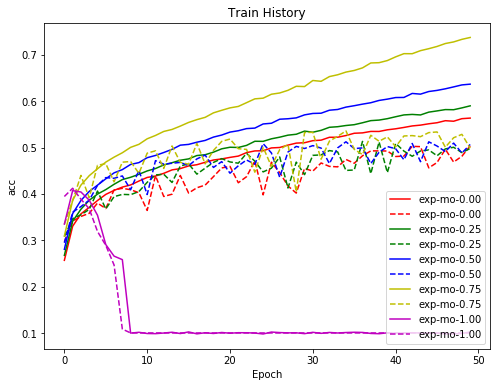

In [13]:
show_train_histories(train_histories, 'acc', 'val_acc', colors, momentums)

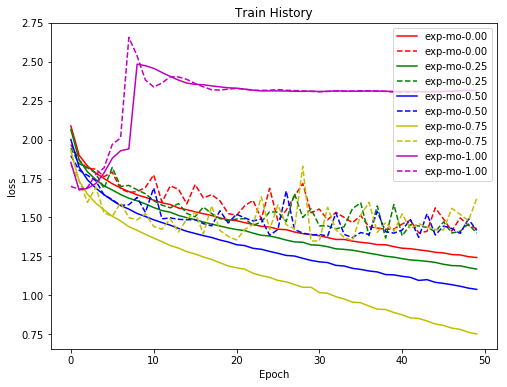

In [14]:
show_train_histories(train_histories, 'loss', 'val_loss', colors, momentums)